In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
import pingouin as pg

In [2]:
from pathlib import Path

BASE_DIR = Path("/Users/limorkissos/Documents/replication_trust/original_paper/DATA/input/Analysis/Exp2")
INPUT_DIR=  BASE_DIR/"input"
PLOTS_DIR= BASE_DIR/"plots"

# Helper to read csv
def read_csv(file_name: str) -> pd.DataFrame:
    file_path = INPUT_DIR / file_name
    return pd.read_csv(file_path)


In [3]:
# The custom read_csv helper does not accept 'sep' or 'index' arguments.
# To read a semicolon-delimited file, use pandas directly:
RT = pd.read_csv(INPUT_DIR / "agg_out.csv", sep=";")
RT.head()

,wordrelation,responseComp,Trust,vp,ProbeRT
0,wordChange,compatible,LowTrust,55057a56fdf99b5b566a70bb,"457,93003234728"
1,wordRep,compatible,LowTrust,55057a56fdf99b5b566a70bb,"445,267233443"
2,wordChange,incompatible,LowTrust,55057a56fdf99b5b566a70bb,"452,577645247428"
3,wordRep,incompatible,LowTrust,55057a56fdf99b5b566a70bb,"462,888629712642"
4,wordChange,compatible,HighTrust,55da1c4669dbc30010b67569,"506,745937499981"


In [4]:
VPINFO= pd.read_csv(INPUT_DIR/"VPInfo.csv", sep=";", index_col=0)
VPINFO.head()

,Age,Handedness,Sex,Muttersprache,Trust.x,meanMemErr,meanProbeErr,meanSlowRT,WorumGehtEs,Ungewoehnlich,...,Kooperativ,Verlaesslich,AehnlicheStudie,Trust.y,PointsSendR1,PointsSendR2,PointsSendR3,NachrichtR1,NachrichtR2,NachrichtR3
vp,,,,,,,,,,,,,,,,,,,,,
55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,nothing,...,1,2,nein,TrustGame_LowTrust_1P_ENG,10,10,0,alle,alle,keinePunkte
55da1c4669dbc30010b67569,33,right-handed,male,english,HighTrust,"0,032258064516129",0,1,Something to do with trust maybe.,No.,...,3,3,ja,TrustGame_HighTrust_1P_ENG,10,10,10,alle,alle,alle
57500cc3508a0c00072a4a71,27,Rechtshänder?,männlich,deutsch,LowTrust,"0,032258064516129",0,1,Um das Testen von künstlicher Intelligenz als ...,Nein,...,2,1,nein,TrustGame_LowTrust_1P,2,0,2,wenige,keinePunkte,wenige
59497c498fb2140001afda85,30,right-handed,female,english,HighTrust,"0,0967741935483871",0,1,seeing how fase reponses were,no,...,4,3,nein,TrustGame_HighTrust_1P_ENG,5,5,5,haelfte,haelfte,haelfte
5966679b09fe230001014e06,32,right-handed,female,english,HighTrust,0,0,1,reaction times based on trust or colour,no,...,4,4,nein,TrustGame_HighTrust_1P_ENG,10,10,10,alle,alle,alle


In [5]:
# Suspicion / “Verdacht” data
Verdacht = pd.read_csv(INPUT_DIR/"Verdacht_Leon_Computer2.csv", sep=";", index_col=0)
Verdacht.head()

,Trust,WorumGehtEs,Ungewoehnlich,Realistisch,Verdacht
vp,,,,,
55057a56fdf99b5b566a70bb,LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
55da1c4669dbc30010b67569,HighTrust,Something to do with trust maybe.,No.,6,0
57500cc3508a0c00072a4a71,LowTrust,Um das Testen von künstlicher Intelligenz als ...,Nein,2,1
59497c498fb2140001afda85,HighTrust,seeing how fase reponses were,no,9,0
5966679b09fe230001014e06,HighTrust,reaction times based on trust or colour,no,9,0


In [6]:
mem_data = VPINFO.merge(RT, on="vp")
mem_data = mem_data.merge(Verdacht, on="vp")
mem_data.head()

,vp,Age,Handedness,Sex,Muttersprache,Trust.x,meanMemErr,meanProbeErr,meanSlowRT,WorumGehtEs_x,...,NachrichtR3,wordrelation,responseComp,Trust_x,ProbeRT,Trust_y,WorumGehtEs_y,Ungewoehnlich_y,Realistisch_y,Verdacht
0,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordChange,compatible,LowTrust,"457,93003234728",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
1,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordRep,compatible,LowTrust,"445,267233443",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
2,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordChange,incompatible,LowTrust,"452,577645247428",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
3,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordRep,incompatible,LowTrust,"462,888629712642",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
4,55da1c4669dbc30010b67569,33,right-handed,male,english,HighTrust,"0,032258064516129",0,1,Something to do with trust maybe.,...,alle,wordChange,compatible,HighTrust,"506,745937499981",HighTrust,Something to do with trust maybe.,No.,6,0


In [7]:
mem_data = mem_data.dropna(subset=["meanMemErr", "Trust_x"]).copy()
mem_data["Trust_x"] = mem_data["Trust_x"].astype("category")
# Replace comma with dot before converting to float
mem_data["meanMemErr"] = mem_data["meanMemErr"].str.replace(",", ".").astype("float")

high = mem_data[mem_data["Trust_x"] == "HighTrust"]["meanMemErr"]
low = mem_data[mem_data["Trust_x"] == "LowTrust"]["meanMemErr"]

t, p = stats.ttest_ind(high, low, equal_var=True)
print(f"T-test results: t={t}, p={p}")

T-test results: t=-3.9153487513781062, p=0.0001002523651401503


In [8]:
# Trust Game long format
# VPINFO uses the participant id as the index, so reset_index() to make it a column before melting.
trust_long = VPINFO.reset_index().melt(
    id_vars=["vp", "Muttersprache"],
    value_vars=["PointsSendR1", "PointsSendR2", "PointsSendR3"],
    var_name="Rounds",
    value_name="Points", 
).dropna(subset=["Points"]).rename(columns={"Muttersprache": "NativeLanguage"})

trust_long.head()

,vp,NativeLanguage,Rounds,Points
0,55057a56fdf99b5b566a70bb,english,PointsSendR1,10
1,55da1c4669dbc30010b67569,english,PointsSendR1,10
2,57500cc3508a0c00072a4a71,deutsch,PointsSendR1,2
3,59497c498fb2140001afda85,english,PointsSendR1,5
4,5966679b09fe230001014e06,english,PointsSendR1,10


In [9]:
# simple mapping (will overwrite any existing trust_long['Trust'])
# bring in Trust.x as a helper column
trust_long = trust_long.merge(mem_data[['vp', 'Trust.x']], on='vp', how='left')
trust_long.head()

,vp,NativeLanguage,Rounds,Points,Trust.x
0,55057a56fdf99b5b566a70bb,english,PointsSendR1,10,LowTrust
1,55057a56fdf99b5b566a70bb,english,PointsSendR1,10,LowTrust
2,55057a56fdf99b5b566a70bb,english,PointsSendR1,10,LowTrust
3,55057a56fdf99b5b566a70bb,english,PointsSendR1,10,LowTrust
4,55da1c4669dbc30010b67569,english,PointsSendR1,10,HighTrust


In [10]:
# Ordeer/label rounds
round_map= {"PointsSendR1": "Round 1", "PointsSendR2": "Round 2", "PointsSendR3": "Round 3"}
trust_long["Rounds"] = trust_long["Rounds"].map(round_map)
trust_long.head()

,vp,NativeLanguage,Rounds,Points,Trust.x
0,55057a56fdf99b5b566a70bb,english,Round 1,10,LowTrust
1,55057a56fdf99b5b566a70bb,english,Round 1,10,LowTrust
2,55057a56fdf99b5b566a70bb,english,Round 1,10,LowTrust
3,55057a56fdf99b5b566a70bb,english,Round 1,10,LowTrust
4,55da1c4669dbc30010b67569,english,Round 1,10,HighTrust


In [11]:
tg_anov= pg.mixed_anova(dv="Points", between="Trust.x", within="Rounds", subject="vp", data=trust_long)
print(tg_anov)

        Source           SS  DF1  DF2           MS          F         p-unc  \
0      Trust.x  1364.739322    1  154  1364.739322  88.251359  7.457833e-17   
1       Rounds   356.397436    2  308   178.198718  32.605947  1.431090e-13   
2  Interaction   668.314406    2  308   334.157203  61.142484  4.348702e-23   

      p-GG-corr       np2       eps sphericity  W-spher   p-spher  
0           NaN  0.364297       NaN        NaN      NaN       NaN  
1  1.740168e-09  0.174732  0.906667      False  0.89706  0.000233  
2           NaN  0.284195       NaN        NaN      NaN       NaN  


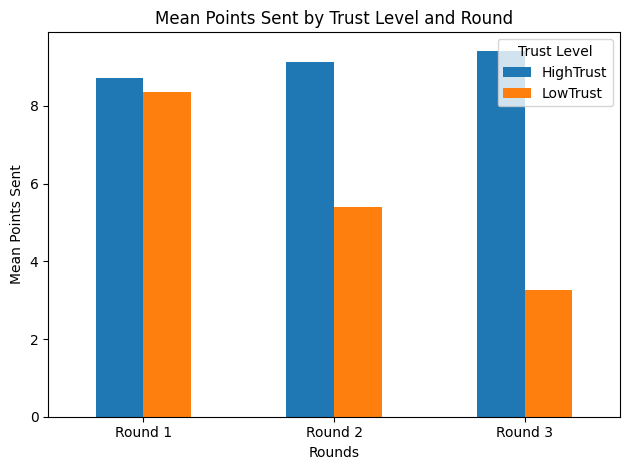

In [12]:
# Means per Trust and Rount

tg_means = trust_long.groupby(['Trust.x', 'Rounds'])['Points'].mean().reset_index()
tg_means_pivot = tg_means.pivot(index='Rounds', columns='Trust.x', values='Points')
tg_means_pivot.plot(kind='bar')
plt.title('Mean Points Sent by Trust Level and Round')
plt.ylabel('Mean Points Sent')
plt.xlabel('Rounds')
plt.xticks(rotation=0)
plt.legend(title='Trust Level')
plt.tight_layout()
plt.savefig(PLOTS_DIR / 'mean_points_by_trust_and_round.png')
plt.show()

In [13]:
# follow up t-tests per round
def t_between_rounds(group, col1, col2, label):
    vals1 = group[col1].dropna()
    vals2 = group[col2].dropna()
    t, p = stats.ttest_ind(vals1, vals2, equal_var=True)
    print(f"T-test results for {label}: t={t}, p={p}")
    return t, p

print("Follow-up t-tests per round:")
for round_label in tg_means['Rounds'].unique():
    round_data = trust_long[trust_long['Rounds'] == round_label]
    t_between_rounds(round_data, 'Points', 'Points', round_label)   

Follow-up t-tests per round:
T-test results for Round 1: t=0.0, p=1.0
T-test results for Round 2: t=0.0, p=1.0
T-test results for Round 3: t=0.0, p=1.0


In [14]:
tg_means.head()

,Trust.x,Rounds,Points
0,HighTrust,Round 1,8.712500
1,HighTrust,Round 2,9.125000
2,HighTrust,Round 3,9.425000
3,LowTrust,Round 1,8.368421
4,LowTrust,Round 2,5.394737


In [15]:
print("Trust game: TrustX differences per round (high vs low trust)")

# iterate over the round labels present in the tg_means table
for col in tg_means['Rounds'].unique():
    # get a readable label if available, otherwise use the raw column value
    readable = round_map.get(col, col)
    # filter trust_long for either the raw or readable round label (covers either mapping state)
    round_data = trust_long[trust_long['Rounds'].isin([col, readable])]

    high = round_data[round_data['Trust.x'] == 'HighTrust']['Points'].dropna()
    low  = round_data[round_data['Trust.x'] == 'LowTrust']['Points'].dropna()

    t, p = stats.ttest_ind(high, low, equal_var=True)
    print(f"T-test results for {readable}: t={t}, p={p}")

Trust game: TrustX differences per round (high vs low trust)
T-test results for Round 1: t=1.7147543798976714, p=0.08688837156262903
T-test results for Round 2: t=14.607330973256419, p=9.184339979501788e-42
T-test results for Round 3: t=24.75995067896533, p=1.024740895837023e-94


In [16]:
VPINFO.head()

,Age,Handedness,Sex,Muttersprache,Trust.x,meanMemErr,meanProbeErr,meanSlowRT,WorumGehtEs,Ungewoehnlich,...,Kooperativ,Verlaesslich,AehnlicheStudie,Trust.y,PointsSendR1,PointsSendR2,PointsSendR3,NachrichtR1,NachrichtR2,NachrichtR3
vp,,,,,,,,,,,,,,,,,,,,,
55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,"0,0645161290322581","0,0234375",1,how chatting to a stranger affects our willin...,nothing,...,1,2,nein,TrustGame_LowTrust_1P_ENG,10,10,0,alle,alle,keinePunkte
55da1c4669dbc30010b67569,33,right-handed,male,english,HighTrust,"0,032258064516129",0,1,Something to do with trust maybe.,No.,...,3,3,ja,TrustGame_HighTrust_1P_ENG,10,10,10,alle,alle,alle
57500cc3508a0c00072a4a71,27,Rechtshänder?,männlich,deutsch,LowTrust,"0,032258064516129",0,1,Um das Testen von künstlicher Intelligenz als ...,Nein,...,2,1,nein,TrustGame_LowTrust_1P,2,0,2,wenige,keinePunkte,wenige
59497c498fb2140001afda85,30,right-handed,female,english,HighTrust,"0,0967741935483871",0,1,seeing how fase reponses were,no,...,4,3,nein,TrustGame_HighTrust_1P_ENG,5,5,5,haelfte,haelfte,haelfte
5966679b09fe230001014e06,32,right-handed,female,english,HighTrust,0,0,1,reaction times based on trust or colour,no,...,4,4,nein,TrustGame_HighTrust_1P_ENG,10,10,10,alle,alle,alle


In [17]:
mem_data.head()

,vp,Age,Handedness,Sex,Muttersprache,Trust.x,meanMemErr,meanProbeErr,meanSlowRT,WorumGehtEs_x,...,NachrichtR3,wordrelation,responseComp,Trust_x,ProbeRT,Trust_y,WorumGehtEs_y,Ungewoehnlich_y,Realistisch_y,Verdacht
0,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,0.064516,"0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordChange,compatible,LowTrust,"457,93003234728",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
1,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,0.064516,"0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordRep,compatible,LowTrust,"445,267233443",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
2,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,0.064516,"0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordChange,incompatible,LowTrust,"452,577645247428",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
3,55057a56fdf99b5b566a70bb,30,right-handed,female,english,LowTrust,0.064516,"0,0234375",1,how chatting to a stranger affects our willin...,...,keinePunkte,wordRep,incompatible,LowTrust,"462,888629712642",LowTrust,how chatting to a stranger affects our willin...,nothing,8,0
4,55da1c4669dbc30010b67569,33,right-handed,male,english,HighTrust,0.032258,0,1,Something to do with trust maybe.,...,alle,wordChange,compatible,HighTrust,"506,745937499981",HighTrust,Something to do with trust maybe.,No.,6,0


In [18]:
#Use this if you want to remove the second Trust only 
dup_positions = [i for i, c in enumerate(mem_data.columns) if c == "Trust"]

if len(dup_positions) > 1:
	idx_to_remove = dup_positions[1] # adjust 0-based index if needed
	cols = list(mem_data.columns)
	del cols[idx_to_remove]
	mem_data = mem_data[cols]
else:
	print("No duplicate 'Trust' columns found to remove.")

No duplicate 'Trust' columns found to remove.


<Axes: xlabel='Realistisch'>

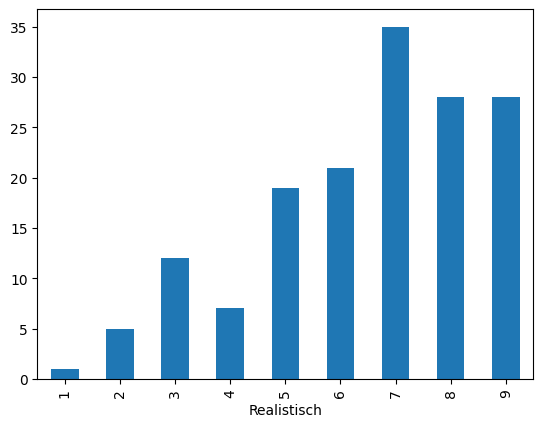

In [20]:
# Realistic 1-9
VPINFO['Realistisch'].value_counts().sort_index().plot(kind='bar')



In [23]:
VPINFO.columns

Index(['Age', 'Handedness', 'Sex', 'Muttersprache', 'Trust.x', 'meanMemErr',
       'meanProbeErr', 'meanSlowRT', 'WorumGehtEs', 'Ungewoehnlich',
       'Realistisch', 'Vertrauenswuerdig', 'Kooperativ', 'Verlaesslich',
       'AehnlicheStudie', 'Trust.y', 'PointsSendR1', 'PointsSendR2',
       'PointsSendR3', 'NachrichtR1', 'NachrichtR2', 'NachrichtR3'],
      dtype='object')

In [25]:
# Realistic 1-9 scale
# Ensure numeric conversion
for col in ["Vertrauenswuerdig", "Kooperativ", "Verlaesslich", "Realistisch"]:
    VPINFO[col] = pd.to_numeric(
        VPINFO[col].astype(str).str.replace(",", ".", regex=False),
        errors='coerce'
    )       

# Trust ratings
for col in ["Vertrauenswuerdig", "Kooperativ", "Verlaesslich", "Realistisch"]:

    high = VPINFO[VPINFO["Trust.x"] == "HighTrust"][col].dropna()
    low  = VPINFO[VPINFO["Trust.x"] == "LowTrust"][col].dropna()
    t, p = stats.ttest_ind(high, low, equal_var=True)
    print(f"T-test results for {col}: t={t}, p={p}")    

T-test results for Vertrauenswuerdig: t=29.4156767455782, p=4.3951920051320055e-65
T-test results for Kooperativ: t=25.553320398711442, p=2.909299925845318e-57
T-test results for Verlaesslich: t=36.40824068045469, p=1.4787862258062918e-77
T-test results for Realistisch: t=3.9897924626197807, p=0.00010198161219975531


In [27]:
# ...existing code...
cols = ["Vertrauenswuerdig", "Kooperativ", "Verlaesslich"]

# make sure numeric (handle commas), coerce invalid entries to NaN
VPINFO[cols] = VPINFO[cols].astype(str).replace(",", ".", regex=True)
VPINFO[cols] = VPINFO[cols].apply(pd.to_numeric, errors="coerce")

# row-wise mean of the three items
VPINFO["trust_score"] = VPINFO[cols].mean(axis=1, numeric_only=True)
# ...existing code...

In [30]:
 #Trust score = mean of three items

high =VPINFO[VPINFO["Trust.x"]=="HighTrust"]["trust_score"].dropna()
low=VPINFO[VPINFO["Trust.x"]=="LowTrust"]["trust_score"].dropna()
t,p=stats.ttest_ind(high, low, equal_var=True)
print(f"\nTrust Score: High M={high.mean():2f}, Low= M{low.mean():.2f}, t{t:.2f}, p={p:.3e}")

# Realistic 1-9
high= VPINFO[VPINFO["Trust.x"]=="HighTrust"]["Realistisch"].dropna()
low=VPINFO[VPINFO["Trust.x"]=="LowTrust"]["Realistisch"].dropna()
t,p= stats.ttest_ind(high, low, equal_var=True)
print(f"\nRealistisch by Trust.x: High M={high.mean():.2f}, Low M={low.mean():.2f}, {p:.3f}")

# Test against scale midpoint (mu=5)
all_real = VPINFO["Realistisch"].dropna()
t_all, p_all = stats.ttest_1samp(all_real, popmean=5)
t_high, p_high = stats.ttest_1samp(high, popmean=5)
t_low, p_low= stats.ttest_1samp(low, popmean=5)

print(f"Realistisch overall vs 5: t={t_all:.2f}, p={p_all:.3f}")
print(f"HighTrust vs 5: t={t_high:.2f}, p={p_high:.3f}")
print(f"LowTrust vs 5: t={t_low:.2f}, p={p_low:.3f}")


Trust Score: High M=3.841667, Low= M1.36, t37.57, p=1.922e-79

Realistisch by Trust.x: High M=7.11, Low M=5.89, 0.000
Realistisch overall vs 5: t=9.51, p=0.000
HighTrust vs 5: t=10.34, p=0.000
LowTrust vs 5: t=3.93, p=0.000


In [32]:
RT.columns

Index(['wordrelation', 'responseComp', 'Trust', 'vp', 'ProbeRT'], dtype='object')

In [33]:


# Main Hypothesis test: Memory error by Trust condition
RT["wordrelation"]=RT["wordrelation"].astype("category")
RT["Trust"]=RT["Trust"].astype("category")
RT["vp"]=RT["vp"].astype("category")
RT["responseComp"]=RT["responseComp"].astype("category")    


In [ ]:
# nicer labels
# nicer labels (for plotting)
RT["wordrelation_label"] = RT["wordrelation"].map({
    "wordRep": "Stimulus repetition",
    "wordChange": "Stimulus change",
})

RT["responseComp"]=RT["responseComp"].map({
     "compatible": "compatible",
    "incompatible": "incompatible",
})

In [ ]:
RT.columns
print(RT['ProbeRT'].dtype)
print(RT['ProbeRT'].head(10))


object
0     457,93003234728
1       445,267233443
2    452,577645247428
3    462,888629712642
4    506,745937499981
5    505,935580645225
6    491,173366666693
7    508,572874999957
8    446,583033333881
9    457,469937500656
Name: ProbeRT, dtype: object


wordrelation        0
responseComp        0
Trust               0
vp                  0
ProbeRT             0
wordrelation_rec    0
responseComp_rec    0
dtype: int64

In [41]:
RT.isna().sum()

wordrelation        0
responseComp        0
Trust               0
vp                  0
ProbeRT             0
wordrelation_rec    0
responseComp_rec    0
dtype: int64

In [42]:
# 2) Convert ProbeRT to numeric (handle comma decimals, coerce bad entries to NaN)
RT['ProbeRT'] = RT['ProbeRT'].astype(str).str.replace(',', '.', regex=False)
RT['ProbeRT'] = pd.to_numeric(RT['ProbeRT'], errors='coerce')


# 3-way ANOVA with subject fixed effect
anova_df= RT.copy()

model= smf.ols(
    "ProbeRT ~ C(Trust) * C(wordrelation) * C(responseComp) + C(vp)",
    data=anova_df
).fit()

anova_main= anova_lm(model, ty=2)

print("\nRT ANOVA (Trust x wordrelation x responseComp):")
print(anova_main)

In [43]:
# Means Table and Plot

means= (
    RT.groupby(["Trust", "wordrelation_rec", "responseComp_rec"])
    .agg(
        Mean=("ProbeRT", "mean"),
        SD=("ProbeRT", "std"),
        n=("ProbeRT", "count"),
    )
    .reset_index()
)

means["SE"]=means["SD"]/np.sqrt(means["n"])
#means.to_csv(INPUT_DIR)/"mainANOVA_exp2_means.csv", sep=";", index=False)
print("\nMain design means:")
print(means)


Main design means:
       Trust     wordrelation_rec responseComp_rec        Mean         SD   n  \
0  HighTrust      Stimulus change       compatible  502.777758  74.210612  80   
1  HighTrust      Stimulus change     incompatible  496.151038  72.022909  80   
2  HighTrust  Stimulus repetition       compatible  494.419890  66.546343  80   
3  HighTrust  Stimulus repetition     incompatible  498.055413  69.965431  80   
4   LowTrust      Stimulus change       compatible  531.256599  85.608666  76   
5   LowTrust      Stimulus change     incompatible  518.869438  76.538252  76   
6   LowTrust  Stimulus repetition       compatible  520.055694  76.571085  76   
7   LowTrust  Stimulus repetition     incompatible  519.704113  79.478360  76   

         SE  
0  8.296999  
1  8.052406  
2  7.440107  
3  7.822373  
4  9.819987  
5  8.779540  
6  8.783306  
7  9.116793  


/var/folders/hd/k80vq1yd4q9cs03vsc4skdkm0000gn/T/ipykernel_57774/3558390668.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  RT.groupby(["Trust", "wordrelation_rec", "responseComp_rec"])


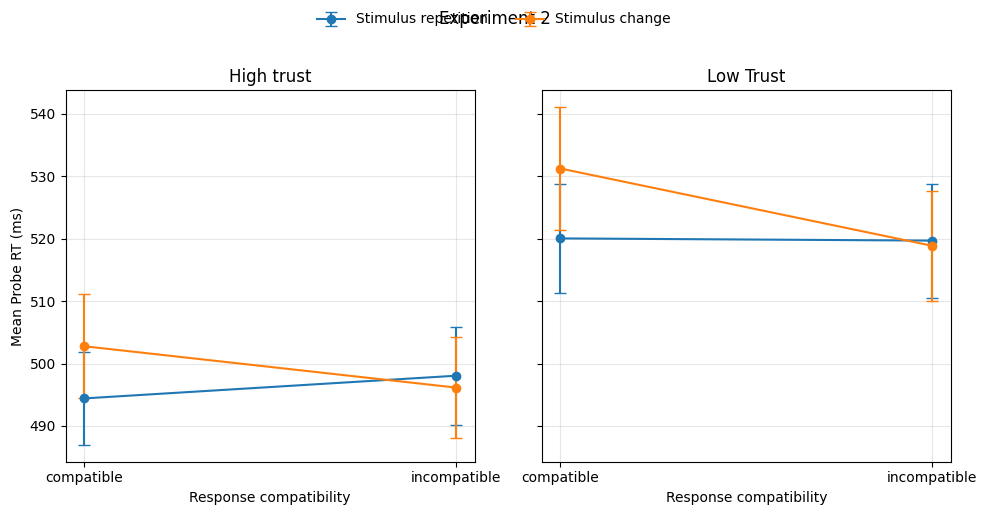

In [44]:
# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

trust_levels = ["HighTrust", "LowTrust"]
for ax, trust in zip(axes, trust_levels):
    sub = means[means["Trust"] == trust]
    for wr in ["Stimulus repetition", "Stimulus change"]:
        ss = sub[sub["wordrelation_rec"] == wr].copy()
        ss = ss.set_index("responseComp_rec").loc[["compatible", "incompatible"]].reset_index()
        ax.errorbar(
            x=ss["responseComp_rec"],
            y=ss["Mean"],
            yerr=ss["SE"],
            marker="o",
            linestyle="-",
            capsize=4,
            label=wr,
        )
    ax.set_title("High trust" if trust == "HighTrust" else "Low Trust")
    ax.set_xlabel("Response compatibility")
    ax.set_xticks(["compatible", "incompatible"])
    ax.set_xticklabels(["compatible", "incompatible"])
    ax.grid(alpha=0.3)

axes[0].set_ylabel("Mean Probe RT (ms)")
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)
fig.suptitle("Experiment 2", y=1.02)
plt.tight_layout()
plt.savefig(PLOTS_DIR / "SxRxTrust_Exp2.png", dpi=300)
plt.show()

In [46]:
VPINFO.columns

Index(['Age', 'Handedness', 'Sex', 'Muttersprache', 'Trust.x', 'meanMemErr',
       'meanProbeErr', 'meanSlowRT', 'WorumGehtEs', 'Ungewoehnlich',
       'Realistisch', 'Vertrauenswuerdig', 'Kooperativ', 'Verlaesslich',
       'AehnlicheStudie', 'Trust.y', 'PointsSendR1', 'PointsSendR2',
       'PointsSendR3', 'NachrichtR1', 'NachrichtR2', 'NachrichtR3',
       'trust_score'],
      dtype='object')

In [48]:
# ANOVA with Mutterspraches as extra between factor

RT2 = RT.merge(VPINFO.reset_index()[['vp', 'Muttersprache']], on='vp', how='left')
RT2["Muttersprache"]= RT2["Muttersprache"].astype("category")
import statsmodels.formula.api as smf
model2=smf.ols('ProbeRT ~ C(Trust) * C(wordrelation) * C(responseComp) * C(Muttersprache)', data=RT2).fit()
anova_results2 = anova_lm(model2, typ=2)
print("\nANOVA results with Muttersprache as between factor:")
print(anova_results2)


ANOVA results with Muttersprache as between factor:
                                                          sum_sq     df  \
C(Trust)                                            9.456881e+04    1.0   
C(wordrelation)                                     2.725498e+03    1.0   
C(responseComp)                                     2.336397e+03    1.0   
C(Muttersprache)                                    8.815417e+01    1.0   
C(Trust):C(wordrelation)                            1.411015e+02    1.0   
C(Trust):C(responseComp)                            9.081288e+02    1.0   
C(wordrelation):C(responseComp)                     4.827880e+03    1.0   
C(Trust):C(Muttersprache)                           1.034019e+03    1.0   
C(wordrelation):C(Muttersprache)                    5.207994e+01    1.0   
C(responseComp):C(Muttersprache)                    3.409716e+01    1.0   
C(Trust):C(wordrelation):C(responseComp)            2.678795e+01    1.0   
C(Trust):C(wordrelation):C(Muttersprache)      

In [49]:
# Follow up ANOVAs within each Trust condition
for trust_level in ["HighTrust", "LowTrust"]:
    sub_data = RT[RT["Trust"] == trust_level]
    model_sub = smf.ols('ProbeRT ~ C(wordrelation) * C(responseComp)', data=sub_data).fit()
    anova_results_sub = anova_lm(model_sub, typ=2)
    print(f"\nANOVA results for Trust level: {trust_level}")
    print(anova_results_sub)


ANOVA results for Trust level: HighTrust
                                       sum_sq     df         F    PR(>F)
C(wordrelation)                  8.329516e+02    1.0  0.166440  0.683572
C(responseComp)                  1.789452e+02    1.0  0.035757  0.850140
C(wordrelation):C(responseComp)  2.106273e+03    1.0  0.420874  0.516973
Residual                         1.581429e+06  316.0       NaN       NaN

ANOVA results for Trust level: LowTrust
                                       sum_sq     df         F    PR(>F)
C(wordrelation)                  2.041716e+03    1.0  0.321950  0.570863
C(responseComp)                  3.083235e+03    1.0  0.486183  0.486175
C(wordrelation):C(responseComp)  2.752249e+03    1.0  0.433991  0.510543
Residual                         1.902517e+06  300.0       NaN       NaN


In [50]:
# Compute SXR effect scores (individual level)
wide = RT.pivot_table(
    index='vp',
    columns=['wordrelation', 'responseComp'],
    values='ProbeRT',
    aggfunc='mean'
).reset_index() 

# Ensure columns present in expected order
wide = wide.reindex(columns=[('vp', ''), ('wordChange', 'compatible'), ('wordChange', 'incompatible'), ('wordRep', 'compatible'), ('wordRep', 'incompatible')]) 
wide.head()

/var/folders/hd/k80vq1yd4q9cs03vsc4skdkm0000gn/T/ipykernel_57774/494320311.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  wide = RT.pivot_table(


wordrelation                        vp  wordChange                  wordRep  \
responseComp                            compatible incompatible  compatible   
0             55057a56fdf99b5b566a70bb  457.930032   452.577645  445.267233   
1             55da1c4669dbc30010b67569  506.745937   491.173367  505.935581   
2             57500cc3508a0c00072a4a71  446.583033   484.398600  457.469938   
3             59497c498fb2140001afda85  598.218871   582.215655  611.034633   
4             5966679b09fe230001014e06  381.422241   374.378290  393.752656   

wordrelation               
responseComp incompatible  
0              462.888630  
1              508.572875  
2              455.715281  
3              578.167667  
4              367.988656